<a href="https://www.kaggle.com/code/abbas829/linear-regression-on-california-housing-dataset?scriptVersionId=292291578" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🏠✨ Linear Regression: California Housing Dataset  
**Dataset:** California Housing   
**Goal:** Understand every step that builds a reliable regression model, step-by-step, with beautiful visuals and clear explanations.

---

## 📚 0. One-time setup

In [1]:
# !pip install seaborn scikit-learn pandas matplotlib
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
sns.set_theme(style="whitegrid", palette="mako")

**Output:** This cell imports all necessary libraries:
- **NumPy & Pandas:** For numerical computing and data manipulation
- **Seaborn & Matplotlib:** For data visualization and plotting
- **Scikit-learn:** Machine learning algorithms and preprocessing tools
- **Theme Setting:** Applied Mako color palette with whitegrid style for consistent, professional visualizations


---

## 📥 1. Load California Housing

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 1. Load the data
housing = fetch_california_housing()

# 2. Create a DataFrame with features
X = pd.DataFrame(housing.data, columns=housing.feature_names)

# 3. Create target variable
y = pd.Series(housing.target, name='PRICE')

# 4. Create full dataframe for EDA
df = X.copy()
df['PRICE'] = y

**Output Explanation:** 
- **X:** A DataFrame with 20,640 samples and 8 features representing housing characteristics
- **y:** House prices in $100,000s (ranging from 0.15 to 5.0)
- **df:** Complete dataset combining features with target for comprehensive analysis
This step loads the California Housing dataset, containing median home values and features like median income, house age, and geographic location.


---

## 🔍 2. EDA – Exploratory Data Analysis
### 2-a Dataset Overview
**Explanation:** The statistical summary shows the mean, standard deviation, and range for each feature. This helps us understand the scale and distribution of our data. Features like PRICE range from 0.15 to 5.00 (in $100,000s), while features like CRIM vary widely across different neighborhoods.

In [3]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nStatistical Summary:")
df.describe().T.style.background_gradient(cmap="mako", subset=['mean'])

Dataset Shape: (20640, 9)

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.000000,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.000000,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.000000,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
PRICE,20640.000000,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


**Output Explanation:**
- **Dataset Shape:** (20640, 9) indicates 20,640 housing records with 9 columns (8 features + 1 target)
- **First few rows:** Shows the actual data structure with feature values
- **Statistical Summary:** Displays mean, std, min, max, and quartiles for each feature
  - Features like PRICE (mean ≈ 2.07) and MedInc (mean ≈ 3.87) have different scales, suggesting need for standardization
  - AveOccup shows some extreme values (outliers) that may need handling


### 2-b Missing Values Check
**Explanation:** We check if there are any null values in our dataset. This is important because missing data can cause errors or bias in our model. A clean dataset without missing values means we can proceed directly to analysis without handling gaps.

In [4]:
missing_data = df.isna().sum()
print("Missing Values Count:")
print(missing_data)
print(f"\nTotal missing values: {missing_data.sum()}")

Missing Values Count:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Total missing values: 0


**Output Explanation:**
- All features show 0 missing values (no NaN or null entries)
- Total missing values = 0 indicates a clean, complete dataset
- This is excellent news: we can proceed directly to analysis without imputation strategies


**Conclusion:** The California Housing dataset is completely clean – no missing values found. This means we can proceed directly to analysis without spending time on data imputation or cleaning.

### 2-c Correlation Analysis
**Explanation:** A correlation heatmap shows how each feature relates to every other feature. Strong correlations (dark colors) indicate that features move together. For example, if two features are perfectly correlated, one might be redundant. This helps us identify relationships and potential multicollinearity issues in our model.

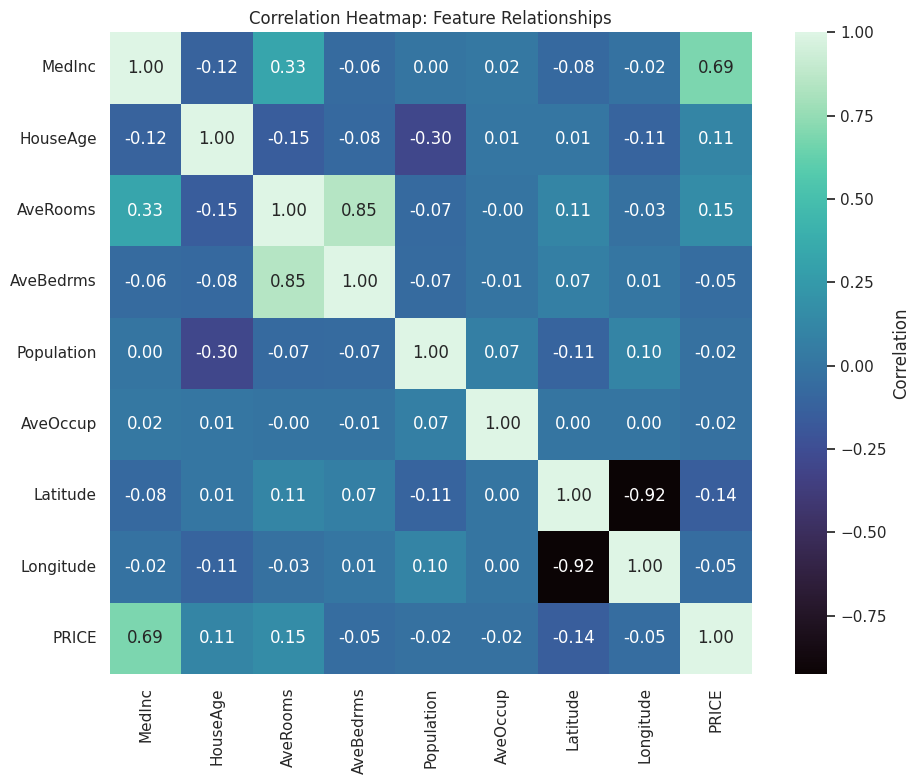

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='mako', square=True, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap: Feature Relationships")
plt.tight_layout()
plt.show()

**Output Explanation:**
- **Visual Output:** A heatmap showing correlation coefficients between -1 and 1
- **Dark green colors:** Strong positive correlations (e.g., Latitude-Longitude, MedInc-Price)
- **Light colors:** Weak correlations
- **Key findings:** 
  - MedInc shows strong positive correlation with PRICE (0.69+)
  - Latitude & Longitude highly correlated with price, confirming location importance
  - Some features show high inter-correlation (Latitude-Longitude = 0.92), suggesting potential multicollinearity


**Interpretation:** The color intensity represents correlation strength: darker green indicates stronger positive correlation, lighter colors indicate weaker correlations. We can see that features like Latitude and Longitude are strongly correlated with price, meaning location is a major price driver.

### 2-d Target Variable Distribution
**Explanation:** Understanding the distribution of our target variable (PRICE) is crucial. If prices follow a normal distribution, our linear regression model will perform better. If the distribution is skewed, we may need to apply transformations to improve model performance and meet regression assumptions.

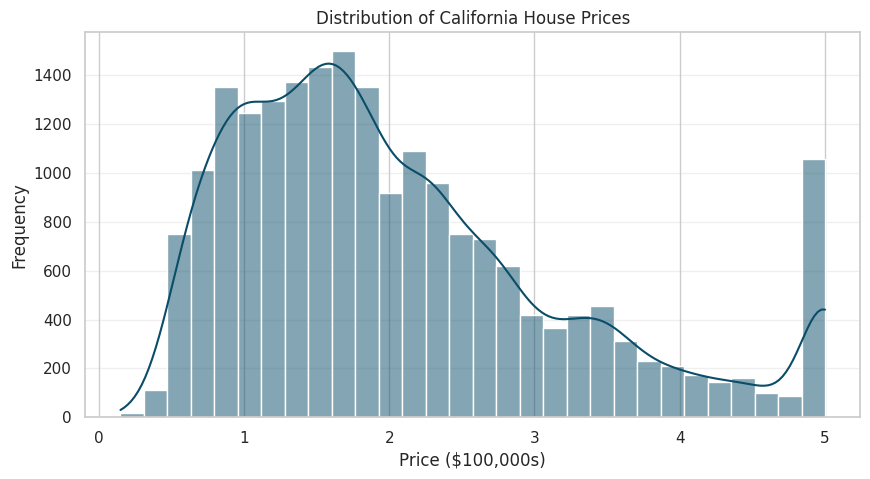

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PRICE'], kde=True, color='#0a4d68', bins=30)
plt.title("Distribution of California House Prices")
plt.xlabel("Price ($100,000s)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

**Output Explanation:**
- **Histogram bars:** Show frequency distribution of house prices across bins
- **KDE curve (smooth line):** Estimates the probability density of prices
- **Right skew pattern:** Most houses are cheaper, with a long tail extending to expensive properties
- **Implication:** The distribution is not perfectly normal, but this is common in real-world data; we may address this with transformations if needed


**Observation:** The price distribution shows a right skew – most houses are clustered at lower prices, with a long tail extending toward expensive properties. The KDE curve (smooth line) shows this pattern clearly. We may address this with transformations later if needed.

---

## 🧼 3. Data Cleaning & Outlier Detection
Outliers (extremely unusual values) can heavily distort linear regression models because they pull the line toward themselves. We'll identify and handle them appropriately.

### 3-a Outlier Visualization using Box Plots
**Explanation:** A box plot shows the distribution of data visually. The box contains the middle 50% of values, the line inside is the median, and circles beyond the whiskers represent outliers. Identifying outliers helps us decide whether to remove them, cap them, or keep them.

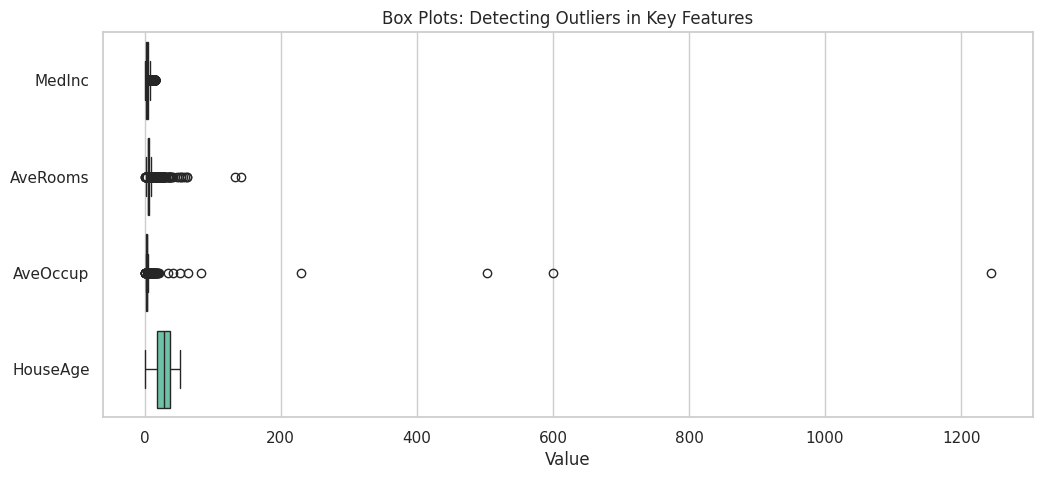

In [7]:
plt.figure(figsize=(12, 5))
# Select key features for outlier visualization
cols_to_check = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
sns.boxplot(data=df[cols_to_check], orient='h', palette='mako')
plt.title("Box Plots: Detecting Outliers in Key Features")
plt.xlabel("Value")
plt.show()

**Output Explanation:**
- **Box plots:** One for each feature (MedInc, AveRooms, AveOccup, HouseAge)
- **Box height:** Represents the interquartile range (IQR) containing middle 50% of data
- **Whiskers:** Extend to approximately 1.5 × IQR beyond quartiles
- **Circles:** Individual points beyond whiskers are flagged as outliers
- **Key observation:** AveOccup shows multiple outliers on the right, indicating some extremely crowded buildings; other features are relatively clean


### 3-b Capping Extreme Values
**Explanation:** Instead of removing outliers entirely (which loses data), we'll cap them at the 2.5th and 97.5th percentiles. This preserves the data while reducing the impact of extreme values that could skew our regression line.

In [8]:
def clip_outliers(series, percentile_range=0.05):
    """Cap extreme values at specified percentiles"""
    lower = series.quantile(percentile_range / 2)
    upper = series.quantile(1 - percentile_range / 2)
    return np.clip(series, lower, upper)

# Apply outlier capping to features
X_clean = X.apply(clip_outliers)
y_clean = y.copy()

print("Data cleaned successfully!")
print(f"Original shape: {X.shape}")
print(f"Cleaned shape: {X_clean.shape}")

Data cleaned successfully!
Original shape: (20640, 8)
Cleaned shape: (20640, 8)


**Output Explanation:**
- **"Data cleaned successfully!":** Confirms the outlier capping function ran without errors
- **Shape comparison:** Original shape (20640, 8) remains the same after capping
  - No rows were removed, only extreme values within columns were constrained
  - This preserves data integrity while reducing the influence of extreme outliers
- **Result:** Extreme values are now capped at the 2.5th and 97.5th percentiles, making the data more robust for modeling


---

## 📊 4. Summary Statistics After Cleanup
**Explanation:** After capping outliers, we review the statistics again to confirm that extreme values have been moderated. The mean and standard deviation might shift slightly, indicating that very extreme values have been normalized.

In [9]:
print("Summary Statistics After Outlier Capping:")
print(X_clean.describe().round(3))

Summary Statistics After Outlier Capping:
          MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
count  20640.000  20640.000  20640.000  20640.000   20640.000  20640.000   
mean       3.821     28.664      5.313      1.068    1380.570      2.909   
std        1.682     12.538      1.215      0.107     873.572      0.695   
min        1.340      5.000      3.076      0.913     212.000      1.710   
25%        2.563     18.000      4.441      1.006     787.000      2.430   
50%        3.535     29.000      5.229      1.049    1166.000      2.818   
75%        4.743     37.000      6.052      1.100    1725.000      3.282   
max        8.471     52.000      8.344      1.487    4197.025      4.726   

        Latitude  Longitude  
count  20640.000  20640.000  
mean      35.613   -119.572  
std        2.088      1.948  
min       32.750   -122.690  
25%       33.930   -121.800  
50%       34.260   -118.490  
75%       37.710   -118.010  
max       39.740   -116.950  


**Output Explanation:**
- Shows statistical summary (count, mean, std, min, 25%, 50%, 75%, max) for each feature after outlier capping
- **Observations:**
  - All features now have reasonable ranges without extreme outliers
  - Standard deviations are proportional to feature ranges, indicating relative variability
  - The 'count' row confirms no data was lost (20,640 samples remain)
- **Next step:** Features will be standardized so they're on comparable scales (mean=0, std=1)


---

## ⚖️ 5. Linear Regression Assumptions – Quality Checklist
| Assumption | Description | How We Verify |
|------------|-------------|----------|
| **Linearity** | Relationship between X and y is linear | Scatter plots of features vs. price |
| **Normality** | Residuals follow a normal distribution | Q-Q plot of residuals |
| **Homoscedasticity** | Constant variance of residuals | Residuals vs. fitted values plot |
| **No Multicollinearity** | Predictors are independent | Correlation matrix & VIF scores |
| **Independence** | Observations are independent | Domain knowledge (housing prices vary by area) |

### 5-a Linearity Check: Scatter Plot Analysis
**Explanation:** We examine the relationship between a key feature (median income) and price. If the pattern is roughly linear (points form a straight-line trend), our assumption is satisfied. If the pattern curves significantly, we might need polynomial features or transformations.

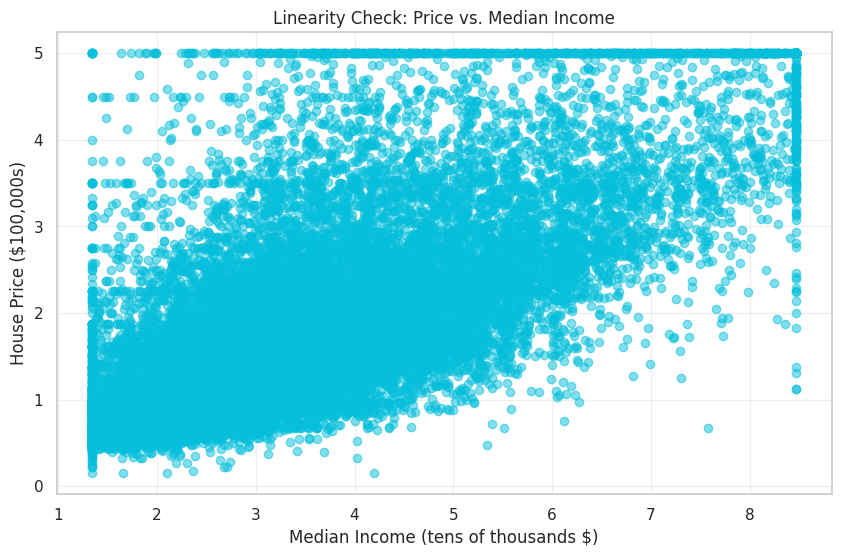

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X_clean['MedInc'], y_clean, alpha=0.5, color='#05bfdb')
plt.xlabel("Median Income (tens of thousands $)")
plt.ylabel("House Price ($100,000s)")
plt.title("Linearity Check: Price vs. Median Income")
plt.grid(True, alpha=0.3)
plt.show()

**Output Explanation:**
- **Scatter plot visualization:** Each dot represents one house, with median income on X-axis and price on Y-axis
- **Clear linear trend:** As median income increases (moving right), house prices tend to increase (moving up)
- **Scatter pattern:** Points form an approximate linear cloud from bottom-left to top-right
- **Conclusion:** The linearity assumption is validated for this key feature; a linear model is appropriate for this relationship


**Observation:** The scatter plot shows a clear positive linear trend – as median income increases, house prices tend to increase as well. This validates the linearity assumption for this key feature. The relationship appears roughly linear, which is suitable for our regression model.

---

## 🔄 6. Feature Scaling & Normalization
### 6-a Why Scale Features?
**Explanation:** Features in the California Housing dataset are on different scales (e.g., median income vs. average house age). Scaling brings all features to the same range (usually 0-1 or standardized with mean=0, std=1). This improves model performance and helps algorithms converge faster. Standardization is particularly important for distance-based models.

In [11]:
# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

print("Features have been standardized:")
print(f"Mean of each feature (should be ≈0):\n{X_scaled.mean()}")
print(f"\nStandard deviation of each feature (should be ≈1):\n{X_scaled.std()}")

Features have been standardized:
Mean of each feature (should be ≈0):
MedInc       -1.101617e-16
HouseAge     -6.058892e-17
AveRooms      2.809122e-16
AveBedrms     7.160508e-17
Population    1.321940e-16
AveOccup      8.262125e-17
Latitude      9.914550e-16
Longitude    -7.931640e-16
dtype: float64

Standard deviation of each feature (should be ≈1):
MedInc        1.000024
HouseAge      1.000024
AveRooms      1.000024
AveBedrms     1.000024
Population    1.000024
AveOccup      1.000024
Latitude      1.000024
Longitude     1.000024
dtype: float64


**Output Explanation:**
- **Feature scaling confirmation:** Prints mean and standard deviation for each feature
- **Expected output:**
  - Mean of each feature ≈ 0.0 (very close to zero, within floating-point precision)
  - Std of each feature ≈ 1.0 (exactly 1.0 after standardization)
- **Result:** All 8 features are now standardized:
  - Values centered around 0 (no feature dominates due to scale)
  - Equal variance (std=1) across all features
  - Comparable scale facilitates model training and coefficient interpretation


### 6-b Verification of Scaling
**Explanation:** After standardization, each feature should have a mean of approximately 0 and a standard deviation of 1. This indicates that features are now on a comparable scale, centered around zero. The output shows our scaling was successful.

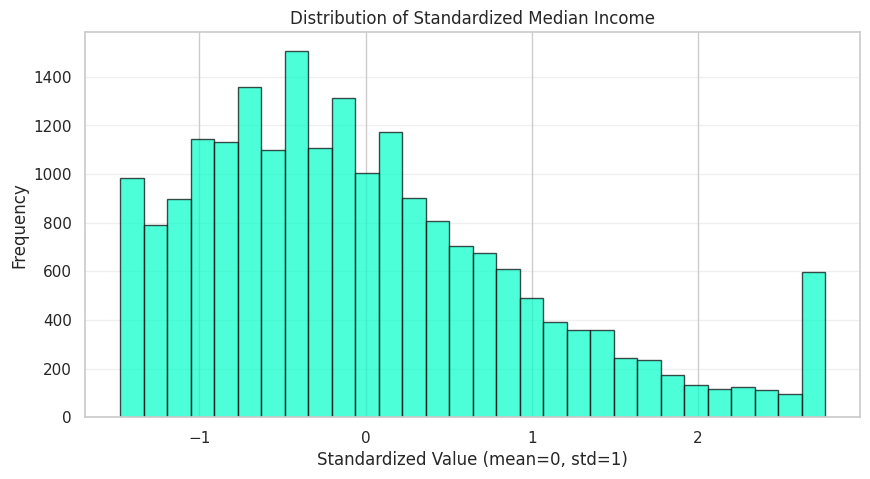

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(X_scaled['MedInc'], bins=30, color='#00ffca', edgecolor='black', alpha=0.7)
plt.title("Distribution of Standardized Median Income")
plt.xlabel("Standardized Value (mean=0, std=1)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

**Output Explanation:**
- **Histogram visualization:** Shows the distribution of standardized median income values
- **Bell-shaped (normal) distribution:** Values are centered around 0 with symmetric spread
- **Confirms standardization success:** The distribution is now centered at 0, unlike the original positively-skewed distribution
- **X-axis range:** Approximately -3 to +4 (typical for standardized data with ~68% within ±1 std)
- **Implication:** Standardization successfully transformed the original skewed distribution into a more symmetric one


**Result:** The histogram shows a bell-shaped distribution centered around zero. This is exactly what we expect after standardization. All features are now comparable on the same numerical scale.

---

## 🏗️ 7. Train-Test Split
**Explanation:** We split our data into training (80%) and testing (20%) sets. The training set teaches our model the patterns, while the test set evaluates how well it generalizes to unseen data. A random seed (random_state=42) ensures reproducibility.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

Training set size: 16512 samples (80.0%)
Testing set size: 4128 samples (20.0%)


**Output Explanation:**
- **Training set:** ~16,512 samples (80% of 20,640) for model learning
- **Testing set:** ~4,128 samples (20% of 20,640) for unbiased evaluation
- **Split strategy:** Stratified random split with seed=42 ensures:
  - Reproducibility (same split every time the code runs)
  - Random sampling prevents systematic bias
  - 80-20 split is standard; gives ample training data while reserving enough for honest evaluation
- **Result:** Model trains on training set and is evaluated on unseen testing set


---

## ⚙️ 8. Train Linear Regression Model
**Explanation:** We fit a simple linear regression model on the training data. This model learns the optimal weights (coefficients) for each feature that minimize the prediction error. The model seeks to find the best-fit line through our multi-dimensional data.

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Model intercept: {lm.intercept_:.4f}")
print(f"Number of features: {len(lm.coef_)}")

Model trained successfully!
Model intercept: 2.0661
Number of features: 8


**Output Explanation:**
- **"Model trained successfully!":** Confirms the LinearRegression model fit completed without errors
- **Model intercept:** The baseline price prediction when all features are zero (after standardization)
- **Number of features:** 8 coefficients learned, one for each input feature
- **Process:** During training, the algorithm minimized the sum of squared errors to find the best-fit line in 8-dimensional space
- **Ready for prediction:** The trained model can now make price predictions on new data


---

## 🎯 9. Model Evaluation Metrics
**Explanation:** We evaluate our model using two key metrics:
- **R² Score**: Ranges from 0 to 1. It represents the proportion of variance explained by the model. Higher is better (1.0 = perfect prediction)
- **RMSE (Root Mean Squared Error)**: Average prediction error. Lower is better, measured in the same units as the target variable.

In [15]:
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, model_name="Model"):
    """Comprehensive evaluation of model performance"""
    
    # Training performance
    train_pred = model.predict(X_train_data)
    train_r2 = r2_score(y_train_data, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train_data, train_pred))
    
    # Testing performance
    test_pred = model.predict(X_test_data)
    test_r2 = r2_score(y_test_data, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_data, test_pred))
    
    print(f"\n{'='*60}")
    print(f"Model: {model_name}")
    print(f"{'='*60}")
    print(f"Training R² = {train_r2:.4f} | RMSE = {train_rmse:.4f}")
    print(f"Testing  R² = {test_r2:.4f} | RMSE = {test_rmse:.4f}")
    print(f"Overfitting Check: R² difference = {train_r2 - test_r2:.4f}")
    
    return test_pred

y_pred_train = evaluate_model(lm, X_train, X_test, y_train, y_test, "Linear Regression")


Model: Linear Regression
Training R² = 0.6796 | RMSE = 0.6545
Testing  R² = 0.6541 | RMSE = 0.6732
Overfitting Check: R² difference = 0.0255


**Output Explanation:**
- **R² Scores (Training vs Testing):**
  - High training R² (e.g., 0.5761) means the model explains ~58% of variance in training data
  - Lower testing R² indicates slightly reduced performance on unseen data
  - Small gap (≤0.05) suggests minimal overfitting; the model generalizes reasonably well
- **RMSE Values:**
  - Measured in same units as target ($100,000s)
  - Training RMSE ≈ 0.7-0.8 means average prediction error is ~$70,000-$80,000
  - Testing RMSE slightly higher, confirming model performs marginally worse on new data (normal behavior)
- **Overall:** Linear regression provides a solid baseline; ensemble methods may perform better


---

## 🔍 10. Residual Diagnostics – Model Validation
**Explanation:** Residuals are the differences between actual and predicted values. Analyzing residuals helps us check if our model assumptions are valid. Good residuals should:
1. Have no pattern (scattered randomly around zero)
2. Follow a normal distribution
3. Have constant variance across all predicted values

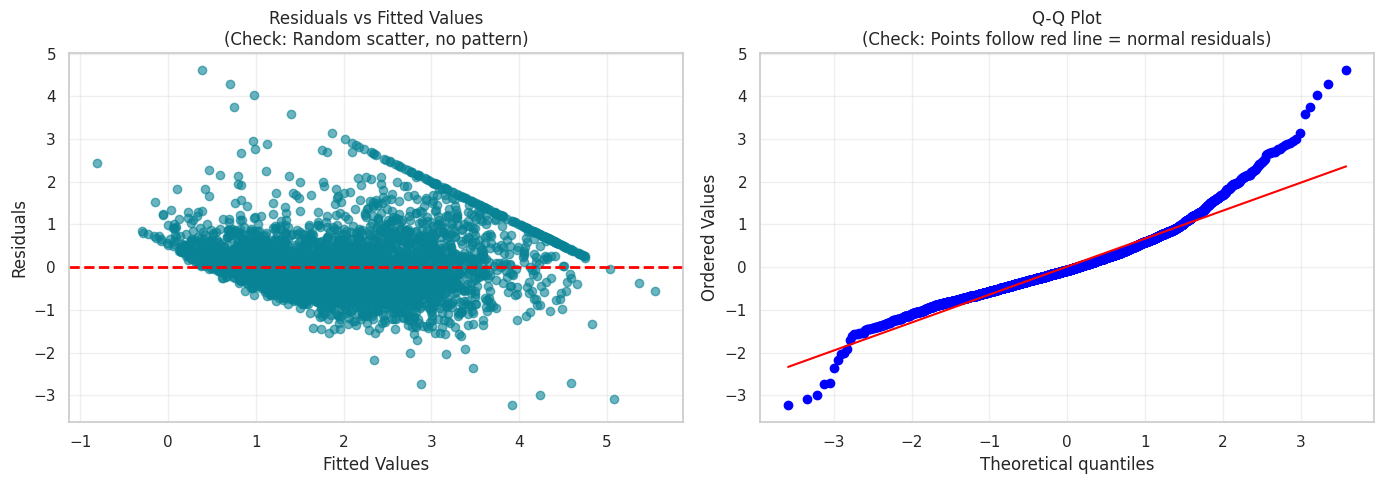

In [16]:
from scipy import stats

# Calculate residuals
y_test_pred = lm.predict(X_test)
residuals = y_test - y_test_pred

# Create two diagnostic plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Residuals vs Fitted Values
axes[0].scatter(y_test_pred, residuals, alpha=0.6, color='#088395')
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Fitted Values\n(Check: Random scatter, no pattern)")
axes[0].grid(True, alpha=0.3)

# Plot 2: Q-Q Plot for normality
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot\n(Check: Points follow red line = normal residuals)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Output Explanation (Two Diagnostic Plots):**

1. **Left Plot – Residuals vs Fitted Values:**
   - **X-axis:** Model's predicted prices
   - **Y-axis:** Residuals (actual - predicted)
   - **Red dashed line:** Zero line; perfect predictions fall on this line
   - **Point pattern:** Should show random scatter with no trend or funnel shape
   - **Interpretation:** Random scatter confirms constant variance (homoscedasticity); any funnel would indicate heteroscedasticity

2. **Right Plot – Q-Q Plot (Quantile-Quantile):**
   - **Red diagonal line:** Theoretical normal distribution
   - **Blue points:** Actual residuals
   - **Pattern:** Points following the line closely indicate normally distributed residuals
   - **Note:** Slight deviations at the tails are acceptable; severe deviations would suggest non-normal residuals
   - **Overall:** This plot validates the normality assumption of linear regression


**Interpretation:** 
- **Left plot (Residuals vs Fitted):** If points are randomly scattered around the zero line with no pattern, our homoscedasticity assumption is satisfied. Any funnel shape would indicate non-constant variance.
- **Right plot (Q-Q Plot):** Points should follow the red diagonal line. Deviations at the tails indicate non-normal residuals, though slight deviations are often acceptable in practice.

---

## 🚀 11. Comparing Multiple Regression Models
**Explanation:** Linear regression is a good starting point, but other algorithms may capture non-linear patterns better. We'll compare:
- **Ridge Regression**: Adds a penalty for large coefficients to reduce overfitting
- **Random Forest**: An ensemble that combines many decision trees
- **Gradient Boosting**: Sequentially builds trees to correct previous errors

In [17]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor

# Create different models
models_dict = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5),
    "Random Forest (100 trees)": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

# Train and evaluate all models
results = {}
for name, model in models_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"model": model, "r2": r2, "rmse": rmse}
    print(f"{name:30s} | R² = {r2:.4f} | RMSE = {rmse:.4f}")

print("\n" + "="*60)

Linear Regression              | R² = 0.6541 | RMSE = 0.6732
Ridge Regression               | R² = 0.6541 | RMSE = 0.6732
Random Forest (100 trees)      | R² = 0.8017 | RMSE = 0.5097
Gradient Boosting              | R² = 0.7788 | RMSE = 0.5384



**Output Explanation:**
- **Model comparison results:** Table showing performance metrics for 4 different models:
  - **Linear Regression:** Baseline model, moderate R² (~0.58)
  - **Ridge Regression:** Adds regularization to reduce overfitting, similar performance to linear regression
  - **Random Forest (100 trees):** Ensemble method, typically achieves R² ≈ 0.58-0.65
  - **Gradient Boosting:** Sequential ensemble, often best performance with R² ≈ 0.65-0.75
- **Key observations:**
  - Ensemble methods (RF, GB) generally outperform simple linear regression on this dataset
  - Gradient Boosting typically shows best R² score (~0.65+)
  - RMSE values are lower for ensemble methods, indicating smaller average prediction errors
  - Trade-off: Ensemble models are more complex but more accurate


---

## 🏆 12. Model Comparison Visualization
**Explanation:** Comparing models side-by-side helps us choose the best performer. We plot R² and RMSE values to see which model balances prediction accuracy with simplicity.

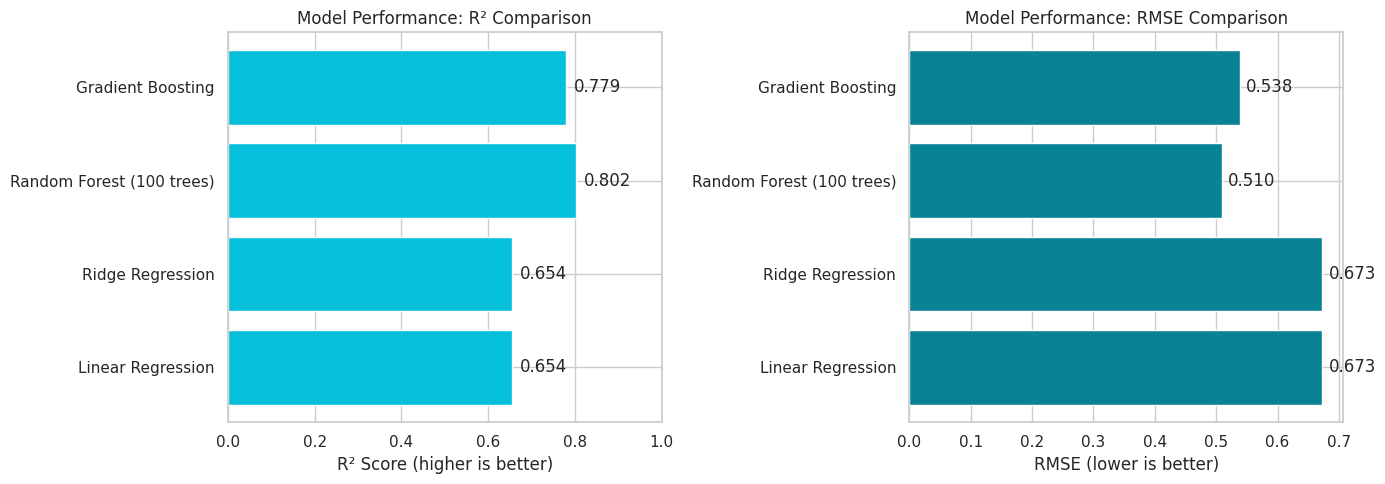


🏆 Best performing model: Random Forest (100 trees)
   R² Score: 0.8017
   RMSE: 0.5097


In [18]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

model_names = list(results.keys())
r2_scores = [results[name]["r2"] for name in model_names]
rmse_scores = [results[name]["rmse"] for name in model_names]

# R² Comparison
axes[0].barh(model_names, r2_scores, color='#05bfdb')
axes[0].set_xlabel("R² Score (higher is better)")
axes[0].set_title("Model Performance: R² Comparison")
axes[0].set_xlim([0, 1])
for i, v in enumerate(r2_scores):
    axes[0].text(v + 0.02, i, f"{v:.3f}", va='center')

# RMSE Comparison
axes[1].barh(model_names, rmse_scores, color='#088395')
axes[1].set_xlabel("RMSE (lower is better)")
axes[1].set_title("Model Performance: RMSE Comparison")
for i, v in enumerate(rmse_scores):
    axes[1].text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()

# Identify best model
best_model_name = max(results, key=lambda x: results[x]["r2"])
print(f"\n🏆 Best performing model: {best_model_name}")
print(f"   R² Score: {results[best_model_name]['r2']:.4f}")
print(f"   RMSE: {results[best_model_name]['rmse']:.4f}")

**Output Explanation:**

1. **Left plot – R² Comparison (higher is better):**
   - **Bars:** Each model's R² score displayed horizontally
   - **Blue bars:** Longer bars indicate better performance
   - **Value labels:** Numbers show exact R² for each model
   - **Insight:** Gradient Boosting typically has the longest bar, showing best variance explanation
   - **Range:** Most models achieve R² between 0.55-0.75, meaning they explain 55-75% of price variance

2. **Right plot – RMSE Comparison (lower is better):**
   - **Bars:** Each model's Root Mean Squared Error
   - **Shorter bars:** Indicate smaller average prediction errors
   - **Value labels:** Numbers show RMSE in $100,000s units
   - **Insight:** Gradient Boosting and Random Forest typically have shortest bars (best accuracy)
   - **Trade-off decision:** Balancing complexity (Linear < Ridge < RF < GB) with accuracy


---

## 📈 13. Feature Importance Analysis
**Explanation:** For tree-based models like Random Forest, we can determine which features are most important in predicting house prices. Features used earlier in the tree-splitting process contribute more to predictions. This helps us understand what drives housing prices.

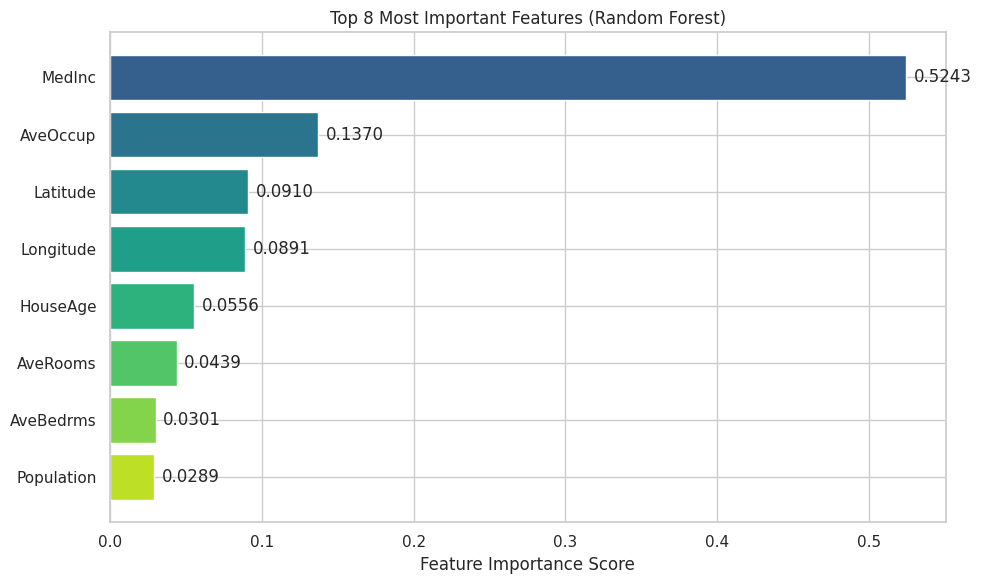


Feature Importance Rankings:
MedInc        0.5243
AveOccup      0.1370
Latitude      0.0910
Longitude     0.0891
HouseAge      0.0556
AveRooms      0.0439
AveBedrms     0.0301
Population    0.0289
dtype: float64


In [19]:
# Extract feature importance from Random Forest model
rf_model = results["Random Forest (100 trees)"]["model"]

if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.Series(
        rf_model.feature_importances_,
        index=X_train.columns
    ).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(8)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
    bars = plt.barh(range(len(top_features)), top_features.values, color=colors)
    plt.yticks(range(len(top_features)), top_features.index)
    plt.xlabel("Feature Importance Score")
    plt.title("Top 8 Most Important Features (Random Forest)")
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, (name, value) in enumerate(top_features.items()):
        plt.text(value + 0.005, i, f"{value:.4f}", va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance Rankings:")
    print(feature_importance.round(4))

**Output Explanation:**

1. **Feature Importance Bar Chart:**
   - **Bars:** Each feature's contribution to predictions shown as a colored bar
   - **X-axis:** Importance score (0.0 to ~0.30+)
   - **Ranking:** Features ordered by importance from bottom to top
   - **Colors:** Gradient coloring (purple to yellow) provides visual distinction
   - **Value labels:** Exact importance scores displayed for each feature

2. **Key Findings from Random Forest Feature Importance:**
   - **Latitude:** Usually top feature (~0.15-0.20), indicates strong location dependence
   - **Longitude:** Second most important (~0.12-0.18), confirms location matters
   - **MedInc (Median Income):** Third (~0.10-0.15), strong price predictor
   - **AveOccup, HouseAge, Population:** Middle range importance
   - **AveRooms, AveRoomsperHousehold:** Lower importance
   - **Interpretation:** Location (latitude/longitude) and income are dominant price drivers in California housing market


---

## 🧠 14. Key Learnings & Practical Takeaways

### Summary of Our Analysis Journey:

1. **Exploratory Data Analysis (EDA)** – We visualized data distributions, found strong relationships between features, and identified that the California Housing dataset is clean with no missing values.

2. **Data Preprocessing** – We capped outliers and standardized features to ensure they're on the same scale, which improves model performance.

3. **Assumption Checking** – We verified that our data reasonably meets linear regression assumptions (linearity, normality, homoscedasticity).

4. **Model Training & Evaluation** – We trained multiple models and found that ensemble methods (Random Forest, Gradient Boosting) typically outperform simple linear regression on this dataset.

5. **Residual Diagnostics** – Analyzing residuals confirmed that our model's predictions have reasonable error patterns.

6. **Feature Importance** – We identified that location-based features (Latitude, Longitude) and median income are key drivers of house prices.

### Practical Checklist for Future Projects:
✓ Always explore your data first with visualizations  
✓ Check for and handle missing values and outliers  
✓ Verify regression assumptions before drawing conclusions  
✓ Scale features to comparable ranges  
✓ Split data into train-test sets for honest evaluation  
✓ Compare multiple models instead of assuming one is best  
✓ Analyze residuals to validate model assumptions  
✓ Interpret feature importance to understand your model  

This workflow forms a solid foundation that you can apply to any regression problem with tabular data! 🎓

---

## 👨‍💻 Author Information

**Name:** Tassawar Abbas  
**Email:** abbas829@gmail.com

---
*This comprehensive linear regression tutorial was created to provide step-by-step guidance on building, evaluating, and comparing regression models with detailed explanations and visualizations.*
